команда: 13  
Участники: Цыгляев Владислав, Габдрахманов Рустам, Лебедев Иван

Вариант: 13 mod 7 + 1 = 7  
Тема: Эрозия

# Источники


1) https://docs.opencv.org/3.4/db/df6/tutorial_erosion_dilatation.html

2) https://homepages.inf.ed.ac.uk/rbf/HIPR2/erode.htm

3) https://docs.opencv.org/3.4/d4/d86/group__imgproc__filter.html#gaeb1e0c1033e3f6b891a25d0511362aeb

4) https://ru.wikipedia.org/wiki/%D0%9C%D0%B0%D1%82%D0%B5%D0%BC%D0%B0%D1%82%D0%B8%D1%87%D0%B5%D1%81%D0%BA%D0%B0%D1%8F_%D0%BC%D0%BE%D1%80%D1%84%D0%BE%D0%BB%D0%BE%D0%B3%D0%B8%D1%8F#%D0%AD%D1%80%D0%BE%D0%B7%D0%B8%D1%8F


5) https://habr.com/ru/articles/113626/

# Теория


При выполнении операции эрозии ядро проходит по всем пикселям изображения. Если в некоторой позиции каждый единичный пиксель структурного элемента совпадет с единичным пикселем бинарного изображения, то выполняется логическое сложение центрального пикселя ядра с соответствующим пикселем выходного изображения. В результате применения операции эрозии все объекты, меньшие чем ядро, стираются, объекты, соединённые тонкими линиями становятся разъединёнными и размеры всех объектов уменьшаются.  

Основной эффект оператора на бинарном изображении — размывание границ областей пикселей переднего плана ( т. е. белых пикселей, как правило). Таким образом, области пикселей переднего плана уменьшаются в размерах, а отверстия внутри этих областей становятся больше.


Чтобы вычислить эрозию двоичного входного изображения этим структурирующим элементом, мы по очереди рассматриваем каждый из пикселей переднего плана во входном изображении. Для каждого пикселя переднего плана (который мы будем называть входным пикселем ) мы накладываем ядро поверх входного изображения так, чтобы центр ядра совпадал с координатами входного пикселя. Если для каждого пикселя в ядре соответствующий пиксель в изображении под ним является пикселем переднего плана, то входной пиксель остается таким, какой он есть. Однако, если какой-либо из соответствующих пикселей в изображении является фоном, входному пикселю также присваивается значение фона.

Пример работы эрозии бинарного изображения с ядром 3 на 3 изображен ниже.

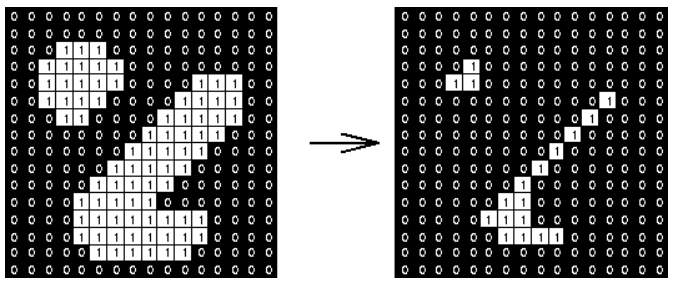

Для цветного изображения или для оттенков серого вычисляется локальный минимум по площади заданного ядра.

Когда ядро сканируется по изображению, мы вычисляем минимальное значение пикселя, перекрываемое ядром и заменяем пиксель изображения под точкой привязки на это минимальное значение.



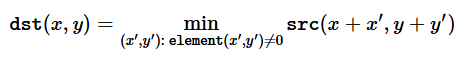

# Реализация

In [31]:
import cv2
import numpy as np
import time
from google.colab.patches import cv2_imshow

Реализуем алгоритм для чернобелого и цветного изображения

In [32]:
def erode_image_manual(image, kernel_size=(3, 3), iterations=1):
    # Определяем размеры изображения и количество каналов
    if len(image.shape) == 2:
        # Градации серого или бинарное изображение
        img_height, img_width = image.shape
        channels = 1
    else:
        # Цветное изображение
        img_height, img_width, channels = image.shape

    kernel_height, kernel_width = kernel_size

    # Определяем смещения для ядра
    pad_h = kernel_height // 2
    pad_w = kernel_width // 2

    # Копируем изображение для обработки
    eroded_image = image.copy()

    for _ in range(iterations):
        # Создаем временную копию изображения для текущей итерации
        temp_image = eroded_image.copy()

        # Обрабатываем каждый канал
        for c in range(channels):
            # Если изображение не цветное, работаем с ним напрямую
            if channels == 1:
                channel_image = temp_image
                eroded_channel = eroded_image
            else:
                channel_image = temp_image[:, :, c]
                eroded_channel = eroded_image[:, :, c]

            # Обрабатываем каждый пиксель
            for i in range(pad_h, img_height - pad_h):
                for j in range(pad_w, img_width - pad_w):
                    # Получаем текущий фрагмент изображения
                    region = channel_image[i - pad_h:i + pad_h + 1, j - pad_w:j + pad_w + 1]
                    center = channel_image[i, j]

                    # Применяем эрозию только если минимальное значение в регионе отличается от центра
                    min_val = np.min(region)
                    if min_val == center:
                        continue
                    else:
                        eroded_channel[i, j] = min_val

    return eroded_image


In [18]:
image_ch_b = (cv2.imread(r'/content/Morphology_1_Tutorial_Theory_Original_Image.png', 0), "White-black")
image_grey = (cv2.imread(r'/content/photo_2024-11-06_15-43-35.jpg', 0), "Grey")
image_color = (cv2.imread(r'/content/photo_2024-11-06_15-43-35.jpg', 1), "Color")
images = [image_ch_b, image_grey, image_color]

Original White-black


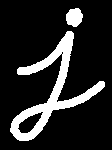

Erosion cv2 White-black


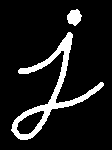

Erosion our alorythm White-black


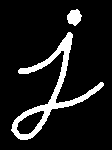

----------------------------------------------------------------------------------------------------
Original Grey


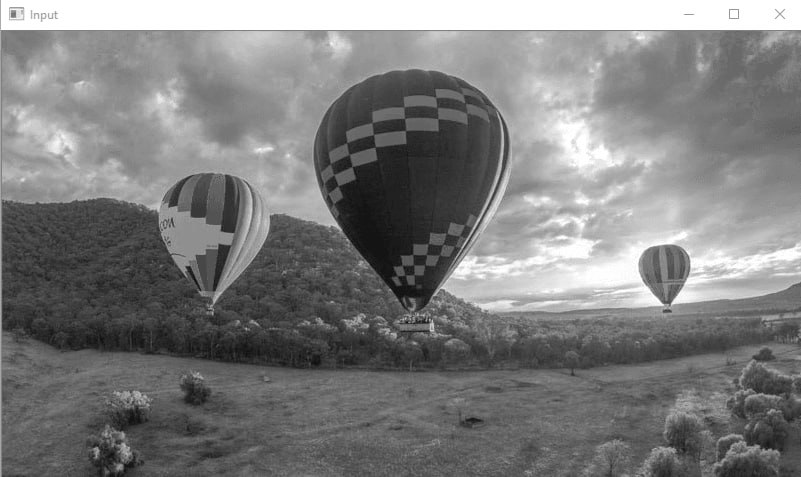

Erosion cv2 Grey


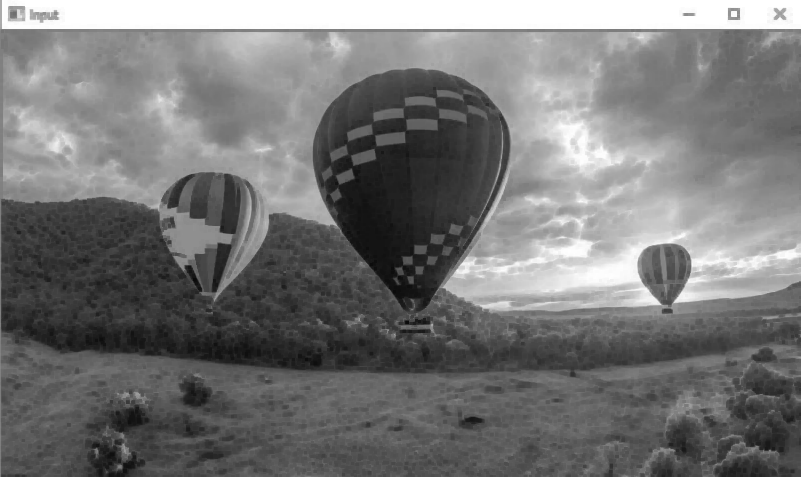

Erosion our alorythm Grey


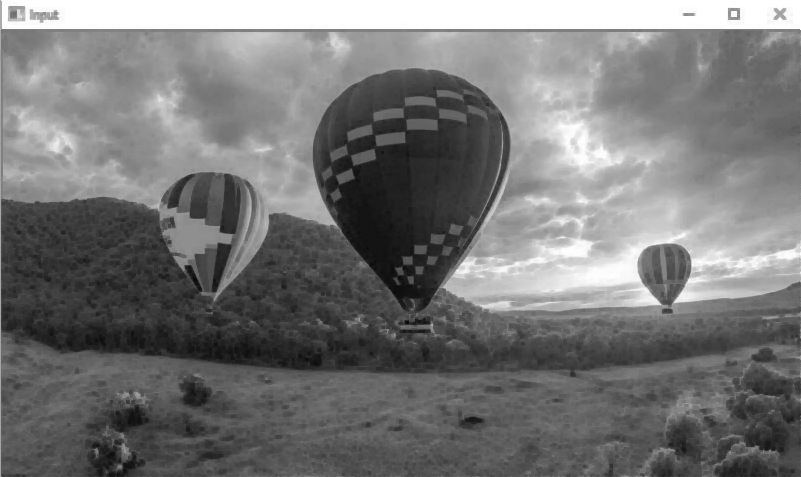

----------------------------------------------------------------------------------------------------
Original Color


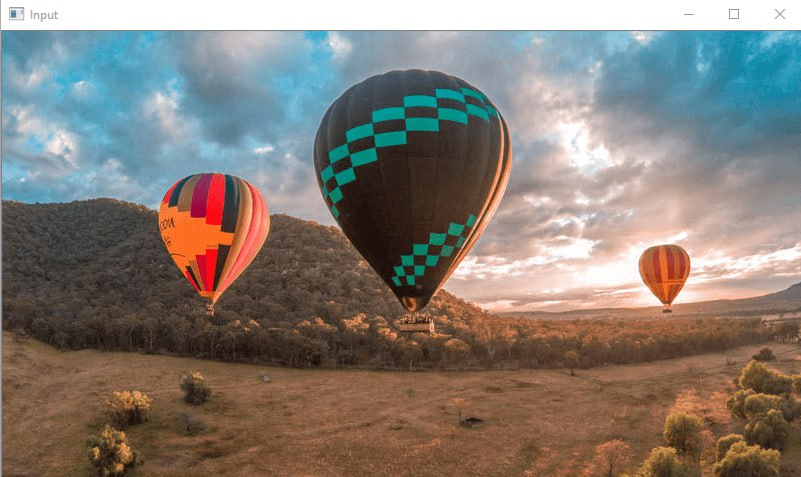

Erosion cv2 Color


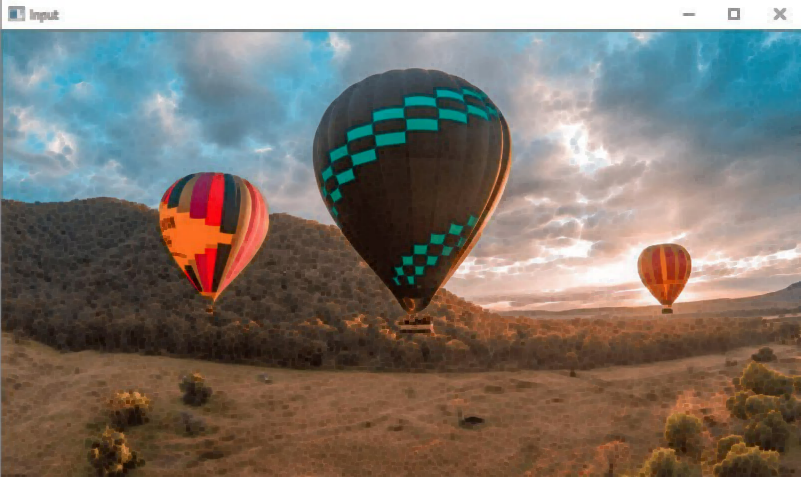

Erosion our alorythm Color


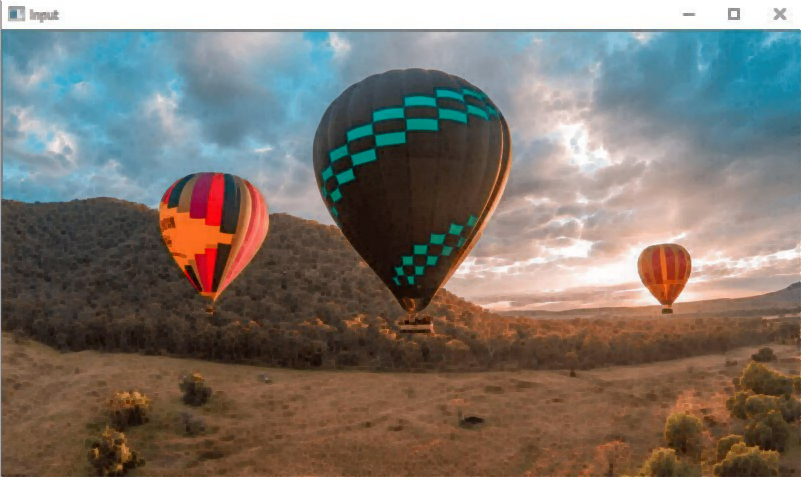

----------------------------------------------------------------------------------------------------


In [26]:
for image in images:
  kernel = np.ones((3,3), np.uint8)
  img_erosion_cv2 = cv2.erode(image[0], kernel, iterations=1)
  img_erosion_our = erode_image_manual(image[0], kernel_size=(3, 3), iterations=1)
  print(f"Original {image[1]}")
  cv2_imshow(image[0])
  print(f"Erosion cv2 {image[1]}")
  cv2_imshow(img_erosion_cv2)
  print(f"Erosion our alorythm {image[1]}")
  cv2_imshow(img_erosion_our)
  print("-"*100)

Совпадают ли изображения

In [41]:
for image in images:
  kernel = np.ones((3,3), np.uint8)
  img_erosion_cv2 = cv2.erode(image[0], kernel, iterations=1)
  img_erosion_our = erode_image_manual(image[0], kernel_size=(3, 3), iterations=1)

  difference = cv2.absdiff(img_erosion_cv2, img_erosion_our)
  total_difference = np.sum(difference)
  num_pixels = image[0].shape[0] * image[0].shape[1] * (image[0].shape[2] if len(image[0].shape) == 3 else 1)
  # average_difference = total_difference / num_pixels
  # print("Средняя абсолютная разница на пиксель:", average_difference)

  max_total_difference = num_pixels * 255  # 255 — максимальная разница между пикселями
  difference_percentage = (total_difference / max_total_difference) * 100
  print(f"Процент от максимальной возможной суммы разностей для: {image[1]}", difference_percentage, "%")

  mse = np.sqrt((np.mean((img_erosion_cv2.astype("float") - img_erosion_our.astype("float")) ** 2)))
  print(f"Среднеквадратичная ошибка (RMSE) для {image[1]}:", mse)

  rel = np.sqrt((np.sum((img_erosion_cv2.astype("float") - img_erosion_our.astype("float")) ** 2))/np.sum(img_erosion_cv2.astype("float")**2))
  print(f"Отношение Евклидовых норм для {image[1]}:", rel)


Процент от максимальной возможной суммы разностей для: White-black 0.0 %
Среднеквадратичная ошибка (RMSE) для White-black: 0.0
Отношение Евклидовых норм для White-black: 0.0
Процент от максимальной возможной суммы разностей для: Grey 0.026599709626336995 %
Среднеквадратичная ошибка (RMSE) для Grey: 1.4574761533627063
Отношение Евклидовых норм для Grey: 0.010973034528573405
Процент от максимальной возможной суммы разностей для: Color 0.027083135434100725 %
Среднеквадратичная ошибка (RMSE) для Color: 1.4876688489565502
Отношение Евклидовых норм для Color: 0.011082705518358786


Полученные изображения совпадают с большой точностью

Оценим время выполнения двух алгоритмов

In [36]:
import timeit

def average_time_of_alogorythms(images, number):
  for image in images:
    def cv_erode():
        cv2.erode(image[0], kernel, iterations=1)


    def manual_erode():
        erode_image_manual(image[0], kernel_size=(3, 3), iterations=1)

    # Измеряем время
    cv_time = timeit.timeit(cv_erode, number=number) / number
    manual_time = timeit.timeit(manual_erode, number=number) / number

    print(f"Среднее время за {number} итераций для cv2.erode for {image[1]}: {cv_time:.6f} секунд")
    print(f"Среднее время за {number} итераций для erode_image_manual for {image[1]}: {manual_time:.6f} секунд")

In [37]:
average_time_of_alogorythms(images, 10)

Среднее время за 10 итераций для cv2.erode for White-black: 0.000039 секунд
Среднее время за 10 итераций для erode_image_manual for White-black: 0.080873 секунд
Среднее время за 10 итераций для cv2.erode for Grey: 0.000145 секунд
Среднее время за 10 итераций для erode_image_manual for Grey: 2.148256 секунд
Среднее время за 10 итераций для cv2.erode for Color: 0.000360 секунд
Среднее время за 10 итераций для erode_image_manual for Color: 6.356819 секунд


# Вывод

Был реализован алгоритм эрозии c ядром 3*3. Также было произведено сравнение с реализацией алгоритма из библиотеки OpenCV. Полученные изображения от двух алгоритом идентичны с большой точностью. Скорость выполнения алгоритма OpenCV быстрее на несколько порядков.